In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:


pd.set_option('display.max_columns', None)

df = pd.read_csv('../data/marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [25]:
df_category = df.select_dtypes(include=['object'])
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)


In [ ]:
correlation = df_numeric.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')	

- NumCatalogPurchases, MntMeatProducts
- NumCatalogPurchases, MntWines
- NumStorePurchases, MntWines
- MntFishProducts, MntFruits
- MntSweetProducts, MntFruits
- MntSweetOridycts, MntFishProducts

Mean Absolute Error 1.34
Mean Squared Error 3.50


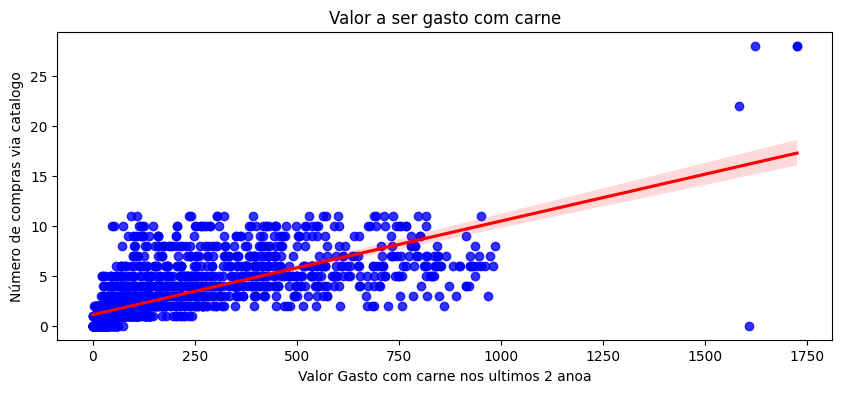

In [42]:
X = df[['MntMeatProducts']]
y = df['NumCatalogPurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error {mae:.2f}")
print(f"Mean Squared Error {mse:.2f}")

plt.figure(figsize=(10,4))
sns.regplot(x=df['MntMeatProducts'], y=df['NumCatalogPurchases'], scatter_kws={'color': "blue"}, line_kws={'color': 'red'})
plt.ylabel('Número de compras via catalogo')
plt.xlabel('Valor Gasto com carne nos ultimos 2 anoa')
plt.title('Valor a ser gasto com carne')
plt.show()